In [68]:
import pandas as pd
import numpy as np
np.random.seed(0)

from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from scikitplot.estimators import plot_learning_curve

from collections import defaultdict
import helper as h

import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_csv('/Users/patrycjapiechowicz/Downloads/titanic.csv')
df.shape

(887, 8)

In [74]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [75]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [76]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [87]:
df.rename(columns={"Siblings/Spouses Aboard": "SibSp", "Parents/Children Aboard": "Parch"}, inplace=True)

In [88]:
df.pivot_table(values=["Survived"], index=["Pclass","Sex"], aggfunc=np.mean)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.137026

In [89]:
def get_X_y(feats):
    X = df[ feats ].fillna(-1).values
    y = df['Survived'].values
    
    return X, y

X, y = get_X_y(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [93]:
X[1]

array([ 1.    , 38.    ,  1.    ,  0.    , 71.2833])

In [92]:
y[1]

1

### Basic Models

In [94]:
cross_val_score(DummyClassifier(random_state=2019), X, y, scoring='accuracy', cv=3).mean()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.5175064895403878

In [95]:
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=2019), X, y, scoring='accuracy', cv=3).mean()

0.6990112994350283

In [96]:
cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=2019), X, y, scoring='accuracy', cv=3).mean()

0.7181859825927622

### Feature  Engineering

In [103]:
df['title'] = df['Name'].map(lambda x: x.split('.')[0])
df['title'].value_counts()

Mr              513
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Mme               1
Capt              1
Don               1
the Countess      1
Sir               1
Ms                1
Jonkheer          1
Lady              1
Name: title, dtype: int64

In [111]:
top_titles = list(df['title'].value_counts().head(5).keys())
title_norm = defaultdict(lambda: 'other', dict(zip(top_titles, top_titles)))
df['title_norm'] = df['title'].map(title_norm)
df['title_norm'].value_counts()


Mr        513
Miss      182
Mrs       125
Master     40
other      20
Dr          7
Name: title_norm, dtype: int64

In [114]:
#train['title_cat'] = train['title'].factorize()[0]
df['title_norm_cat'] = df['title_norm'].factorize()[0]

In [116]:
df['title_norm_cat'].unique()

array([0, 1, 2, 3, 4, 5])

### Model Training with extra feature

In [117]:
X, y = get_X_y(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'title_norm_cat'])
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=2019), X, y, scoring='accuracy', cv=3).mean()

0.8151129943502825

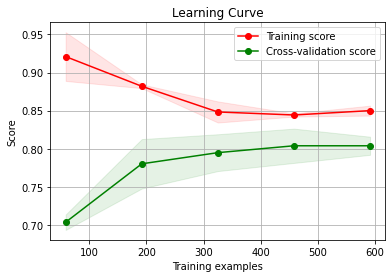

In [118]:
plot_learning_curve(DecisionTreeClassifier(max_depth=4, random_state=2019), X, y, cv=3);

### Age

In [119]:
dict_mean_age_by_title = df.groupby('title_norm').agg(np.mean)['Age'].to_dict()
dict_mean_age_by_title

{'Dr': 42.57142857142857,
 'Master': 4.64175,
 'Miss': 21.994505494505493,
 'Mr': 31.839181286549707,
 'Mrs': 35.768,
 'other': 42.5}

In [121]:
dict_median_age_by_title = df.groupby('title_norm').agg(np.median)['Age'].to_dict()
dict_median_age_by_title

{'Dr': 46.0,
 'Master': 4.0,
 'Miss': 21.0,
 'Mr': 29.0,
 'Mrs': 35.0,
 'other': 43.5}

In [122]:
df['age_mean'] = df.title_norm.map(dict_mean_age_by_title)
df['age_median'] = df.title_norm.map(dict_median_age_by_title)

### Model Training with extra feature

In [124]:
X, y = get_X_y(['Pclass', 'title_norm_cat', 'SibSp', 'Parch', 'Fare', 'age_mean', 'age_median'])
cross_val_score(DecisionTreeClassifier(max_depth=4, random_state=2019), X, y, scoring='accuracy', cv=3).mean()

0.8218812032371354

### Family

In [126]:
df['family_size']   = df['SibSp'] + df['Parch'] + 1
df['family_single'] = df['family_size'] == 1
df['family_small']  = (df['family_size'] > 1) & (df['family_size'] < 5)
df['family_big']  = df['family_size'] > 4

df['child'] = df['age_mean'] < 18
df['adult'] = df['age_mean'] >= 18

def is_mother(row):
    if row['Sex'] == 'male': return False
    if row['title_norm_cat'] == 'miss': return False
    if row['age_mean'] < 18: return False
    
    return True

df['is_mother'] = df.apply(is_mother, axis=1)
print(df['is_mother'].value_counts())

False    573
True     314
Name: is_mother, dtype: int64


In [127]:
X, y = get_X_y(['Pclass', 'title_norm_cat', 'SibSp', 'Parch', 'Fare', 'age_mean', 'age_median', 'family_size', 'family_single', 'family_small', 'family_big'])
cross_val_score(DecisionTreeClassifier(max_depth=4, random_state=2019), X, y, scoring='accuracy', cv=3).mean()

0.8230073293632616

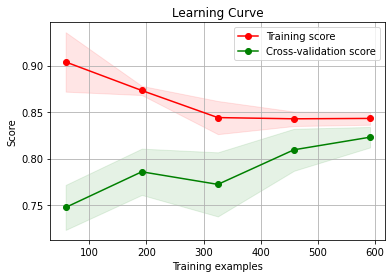

In [128]:
plot_learning_curve(DecisionTreeClassifier(max_depth=4, random_state=2019), X, y, cv=3);